### Multiple Linear Regression

In [175]:
from sklearn.datasets import fetch_california_housing

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [177]:
california = fetch_california_housing()

In [178]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [179]:
type(california)  # dictionary

sklearn.utils._bunch.Bunch

In [180]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [181]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [182]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [183]:
california.target_names 

['MedHouseVal']

In [184]:
print(california.data)  ## input features

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [185]:
print(california.target)  ## output features

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [186]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [187]:
## Preparing the dataframe

df = pd.DataFrame(california.data,columns=california.feature_names)

In [188]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [189]:
df['price']=  california.target

In [190]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [192]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [193]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [194]:
import seaborn as sns

In [195]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

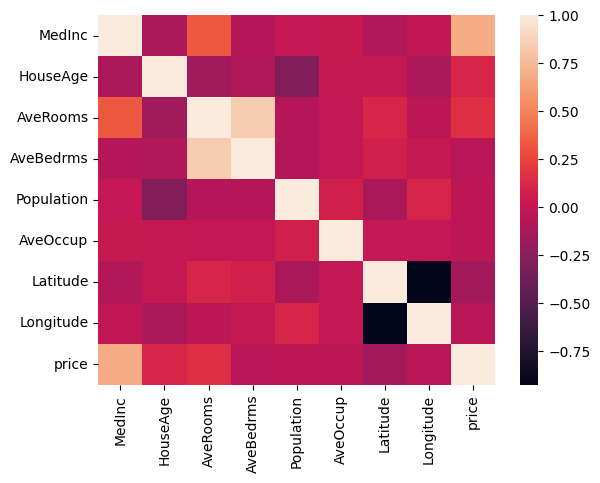

In [196]:
sns.heatmap(df.corr())

In [197]:
## Independent and dependent features

X = df.drop('price',axis=1)  ## or X = df.iloc[:,:-1]   ##independent featues
Y = df['price']  ## dependent features

In [198]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [199]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=42)

In [201]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(13828, 8) (6812, 8)
(13828,) (6812,)


In [202]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [203]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
X_train

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
        -0.78315293,  0.65090402],
       [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
         0.8475975 , -1.31911678],
       [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
        -0.87218816,  0.66087881],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
        -0.75972261,  0.60103008],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
         0.90383028, -1.18445713],
       [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
         0.9928655 , -1.41387727]], shape=(13828, 8))

In [205]:
X_test

array([[-1.15370815, -0.28250584, -0.50803348, ...,  0.05921216,
         0.19154848,  0.28682423],
       [-0.70700034,  0.11430975, -0.16215378, ..., -0.03549556,
        -0.23956945,  0.06239148],
       [-0.20842797,  1.86029835, -0.59583032, ..., -0.13983657,
         1.0069237 , -1.42385206],
       ...,
       [-0.02167353, -1.07613702,  0.40141018, ...,  0.03744641,
         1.43335556, -0.90516304],
       [ 0.27275111, -1.47295261,  0.29311784, ...,  0.0519346 ,
        -0.73160623,  1.09478213],
       [-0.59570436,  1.78093523, -0.64482761, ..., -0.06665881,
         0.99755157, -1.43881424]], shape=(6812, 8))

## Model Training

In [206]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [207]:
model.fit(X_train,Y_train)

LinearRegression()

In [208]:
model.coef_  ## many slopes for different features

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [209]:
model.intercept_  ## only one intercept

np.float64(2.0666362048018536)

In [210]:
## prediction for test data
y_pred = model.predict(X_test)

In [211]:
y_pred


array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279], shape=(6812,))

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [212]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.5369686543372459
0.5295710106684453
0.7327814505957735


In [213]:
score=r2_score(Y_test,y_pred)
print(score)

0.5970494128783952


In [215]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.5965755624158091

## Assumptions

Text(0, 0.5, 'Test Predicted Data')

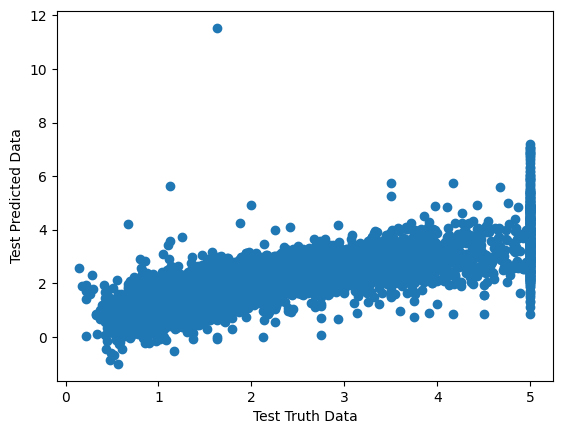

In [217]:
plt.scatter(Y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [218]:
residuals=Y_test-y_pred

In [219]:
residuals

20046   -0.248635
3024    -1.308502
15663    2.294552
20484   -0.647254
9814     0.175899
           ...   
15316    0.536187
14772   -0.744167
12870   -0.188031
13476   -0.359730
16123    0.812737
Name: price, Length: 6812, dtype: float64

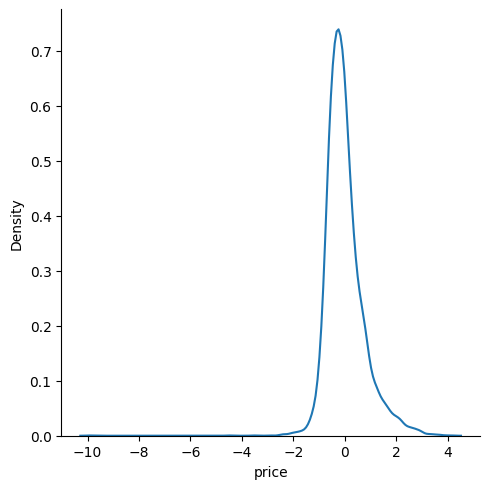

In [220]:
sns.displot(residuals,kind="kde")

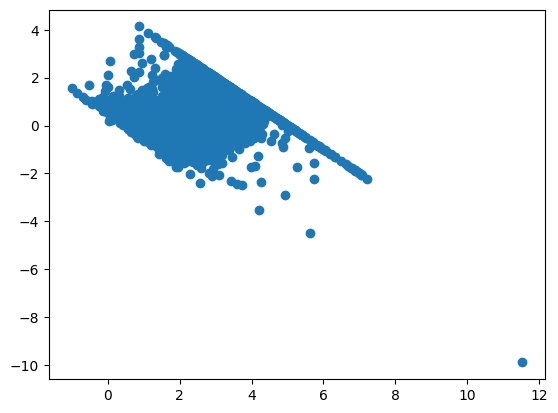

In [ ]:
## Scatter plot with predictions and residual
## NOT uniform distribution  -> we can see patterns, not a good model
plt.scatter(y_pred,residuals)

In [222]:
model

LinearRegression()

## Pickling 
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))  ## for dumping or saving in hard disk

In [ ]:
Model=pickle.load(open('model.pkl','rb'))  ## loading 

In [228]:
model.predict(X_train)

array([1.12232137, 2.55537849, 2.32341979, ..., 2.03711897, 2.8391594 ,
       2.27541365], shape=(13828,))

In [229]:
model.predict(X_test)

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279], shape=(6812,))